<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

<div class="alert alert-info">
 <font color='Blue'>
     <b>Открываем файл с данными и изучаем общую информацию, используем параметр 'sep' для корректного отображения данных</font>
 

In [1]:
import pandas as pd
#df=pd.read_csv(r"C:\Users\Asus\Desktop\Data Science\Third Project\real_estate_data.csv",sep='\t')
df=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
 <font color='Blue'>
     <b>Посчитаем долю пропущенных данных в столбцах, путем суммирования количества заполненных ячеек и делением его на все ячейки

In [2]:
share_of_missing_in_ceiling_height = df['ceiling_height']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце ceiling_height:',"{:.2%}".format(share_of_missing_in_ceiling_height))
share_of_missing_in_floors_total = df['floors_total']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце floors_total:',"{:.2%}".format(share_of_missing_in_floors_total))
share_of_missing_in_living_area = df['living_area']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце living_area:',"{:.2%}".format(share_of_missing_in_living_area))
share_of_missing_in_is_apartment = df['is_apartment']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце is_apartment:',"{:.2%}".format(share_of_missing_in_is_apartment))
share_of_missing_in_kitchen_area = df['kitchen_area']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце kitchen_area:',"{:.2%}".format(share_of_missing_in_kitchen_area))
share_of_missing_in_balcony = df['balcony']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце balcony:',"{:.2%}".format(share_of_missing_in_balcony))
share_of_missing_in_locality_name = df['locality_name']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце locality_name:',"{:.2%}".format(share_of_missing_in_locality_name))
share_of_missing_in_airports_nearest = df['airports_nearest']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце airports_nearest:',"{:.2%}".format(share_of_missing_in_airports_nearest))
share_of_missing_in_cityCenters_nearest = df['cityCenters_nearest']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце cityCenters_nearest:',"{:.2%}".format(share_of_missing_in_cityCenters_nearest))
share_of_missing_in_parks_around3000 = df['parks_around3000']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце parks_around3000:',"{:.2%}".format(share_of_missing_in_parks_around3000))
share_of_missing_in_parks_nearest = df['parks_nearest']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце parks_nearest:',"{:.2%}".format(share_of_missing_in_parks_nearest))
share_of_missing_in_ponds_around3000 = df['ponds_around3000']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце ponds_around3000:',"{:.2%}".format(share_of_missing_in_ponds_around3000))
share_of_missing_in_ponds_nearest = df['ponds_nearest']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце ponds_nearest:',"{:.2%}".format(share_of_missing_in_ponds_nearest))
share_of_missing_in_days_exposition = df['days_exposition']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце days_exposition:',"{:.2%}".format(share_of_missing_in_days_exposition))

Доля пропущенных в столбце ceiling_height: 38.80%
Доля пропущенных в столбце floors_total: 0.36%
Доля пропущенных в столбце living_area: 8.03%
Доля пропущенных в столбце is_apartment: 88.29%
Доля пропущенных в столбце kitchen_area: 9.61%
Доля пропущенных в столбце balcony: 48.61%
Доля пропущенных в столбце locality_name: 0.21%
Доля пропущенных в столбце airports_nearest: 23.38%
Доля пропущенных в столбце cityCenters_nearest: 23.29%
Доля пропущенных в столбце parks_around3000: 23.28%
Доля пропущенных в столбце parks_nearest: 65.91%
Доля пропущенных в столбце ponds_around3000: 23.28%
Доля пропущенных в столбце ponds_nearest: 61.56%
Доля пропущенных в столбце days_exposition: 13.42%


### Вывод

<div class="alert alert-info">
 <font color='Blue'>
     <b>Выявили пропущенные значения:</b>
        <p>
- ceiling_height (высота потолков (м)) -  можно заполнить медианным или средним значениями
            <p>
- floors_total (всего этажей в доме) - пропущенных данных мало 0,36% возможно заполнить средним значением
                <p>
- living_area (жилая площадь в квадратных метрах (м²)) - можно заполнить медианным или средним значениями
                    <p>
- is_apartment (апартаменты (булев тип)) - можно предположить что пропущенные данные у квартир не являющиеся апартаментами
                        <p>
- kitchen_area (площадь кухни в квадратных метрах (м²)) - можно заполнить медианным или средним значениями
                            <p>
- balcony (число балконов) - можно предположить что пропущенные данные указывают на отсутствие балкона
                                <p>
- locality_name (название населённого пункта) - пропущенных данных мало 0,21%, возможно оставить пустыми
                                    <p>
- airports_nearest (расстояние до ближайшего аэропорта в метрах (м)) - можно заполнить медианным или средним значениями
                                        <p>
- cityCenters_nearest (расстояние до центра города (м)) - можно заполнить медианным или средним значениями
                                            <p>
- parks_around3000 (число водоёмов в радиусе 3 км) - можно предположить что пропущенные данные указывают на отсутствие парков
                                                <p>
- parks_nearest (расстояние до ближайшего парка (м)) - оставляем пустыми так как нет подходящего значения на замену
                                                    <p>
- ponds_around3000 (число водоёмов в радиусе 3 км) - можно предположить что пропущенные данные указывают на отсутствие водоёмов
                                                        <p>
- ponds_nearest (расстояние до ближайшего водоёма (м)) - оставляем пустыми так как нет подходящего значения на замену
                                                            <p>
- days_exposition (сколько дней было размещено объявление (от публикации до снятия)) - можно заполнить медианным или средним значениями


## Предобработка данных

<div class="alert alert-info">
<font color='Blue'>
    <b>Чтобы понять причину возникновения пропусков данных, выведем только те строки и столбцы, в которых они есть:</font>

In [3]:
df[df.isnull().any(1)]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<div class="alert alert-info">
<font color='Blue'>
    <b>Предположительно,появление пропусков данных вызвано отсутствием информации.
        <p>
Можем сообщить о проблеме заказчику и запросить метаданные для дальнейшего анализа</font>

<div class="alert alert-info">
<font color='Blue'>
    <b>Заполняю пропуски медианным значением в случае количественных переменных это лучшее решение для этой ситуации, так как медиана не подвержена выбросам.
    </font>

In [4]:
#считаю медиану для столбцов и сразу заполняю пропуски в случаях количественных переменных, где это уместно
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())
df['floors_total']=df['floors_total'].fillna(df['floors_total'].median())
df['living_area']=df['living_area'].fillna(df['living_area'].median())
df['kitchen_area']=df['kitchen_area'].fillna(df['kitchen_area'].median())
df['airports_nearest']=df['airports_nearest'].fillna(df['airports_nearest'].median())
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())
df['days_exposition']=df['days_exposition'].fillna(df['days_exposition'].median())
df['balcony']=df['balcony'].fillna(0) #меняю на 0 пропущенные данные о балконах
df['parks_around3000']=df['parks_around3000'].fillna(0) #меняю на 0 пропущенные данные о парках
df['ponds_around3000']=df['ponds_around3000'].fillna(0) #меняю на 0 пропущенные данные о водоёмах
df['is_apartment']=df['is_apartment'].fillna('False') #меняю на False пропущенные данные о водоёмах
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,False,...,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df=df.query('kitchen_area+living_area<total_area')
df.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22886 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22886 non-null  int64  
 1   last_price            22886 non-null  float64
 2   total_area            22886 non-null  float64
 3   first_day_exposition  22886 non-null  object 
 4   rooms                 22886 non-null  int64  
 5   ceiling_height        22886 non-null  float64
 6   floors_total          22886 non-null  float64
 7   living_area           22886 non-null  float64
 8   floor                 22886 non-null  int64  
 9   is_apartment          22886 non-null  object 
 10  studio                22886 non-null  bool   
 11  open_plan             22886 non-null  bool   
 12  kitchen_area          22886 non-null  float64
 13  balcony               22886 non-null  float64
 14  locality_name         22838 non-null  object 
 15  airports_nearest   

In [6]:
df['last_price']=df['last_price'].astype('int')#тип int, для удобства работы 
df['is_apartment']=df['is_apartment'].astype('bool') #булевский тип, поскольку всего два значения(истина или ложь)
df['floors_total']=df['floors_total'].astype('int') #количество - тип Int для экономии памяти и отсечения точки и нуля
df['balcony']=df['balcony'].astype('int') #количество балконов - тип int для экономии памяти и отсечения точки и нуля
df['parks_around3000']=df['parks_around3000'].astype('int') #количество парков в радиусе 3км - тип int для экономии памяти и отсечения точки и нуля
df['ponds_around3000']=df['ponds_around3000'].astype('int')#количество водоемов в радиусе 3км- тип int для экономии памяти и отсечения точки и нуля
df['days_exposition ']=df['days_exposition'].astype('int')#количество дней- тип int для экономии памяти и отсечения точки и нуля
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22886 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22886 non-null  int64  
 1   last_price            22886 non-null  int64  
 2   total_area            22886 non-null  float64
 3   first_day_exposition  22886 non-null  object 
 4   rooms                 22886 non-null  int64  
 5   ceiling_height        22886 non-null  float64
 6   floors_total          22886 non-null  int64  
 7   living_area           22886 non-null  float64
 8   floor                 22886 non-null  int64  
 9   is_apartment          22886 non-null  bool   
 10  studio                22886 non-null  bool   
 11  open_plan             22886 non-null  bool   
 12  kitchen_area          22886 non-null  float64
 13  balcony               22886 non-null  int64  
 14  locality_name         22838 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0,95
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,True,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,81
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,558
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,424
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,121


<div class="alert alert-info">
<font color='Blue'>
    <b>Проверим столбцы на аномалии 
    </font>

In [7]:
def anomaly_check(dataframe,column):
    
    if column=='total_images':
            for i in dataframe[column]:
                if i<0 or i>100:
                    print(i,end=' ')
    if column=='last_price':
        for i in dataframe[column]:
                if i<0: 
                    print(i,end=' ')
    if column=='total_area':
        for i in dataframe[column]:
            if i<0 or i>300:
                print(round(i),end=' ')
    if column=='rooms':
        for i in dataframe[column]:
            if i<=0 or i>20:
                print(i, end=' ')
    if column=='ceiling_height':
        for i in dataframe[column]:
            if i<0 and i>6:
                print(i)
                
print('Аномальные значения столбца total_images:')
anomaly_check(df,'total_images')
print('Аномальные значения столбца last_price:')
anomaly_check(df,'last_price')
print('Аномальные значения столбца total_area:')
anomaly_check(df,'days_employed')
print('Аномальные значения столбца rooms:')
anomaly_check(df,'rooms')

Аномальные значения столбца total_images:
Аномальные значения столбца last_price:
Аномальные значения столбца total_area:
Аномальные значения столбца rooms:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [8]:
df['rooms'].value_counts()
print('Доля аномальных значений столбца room',"{:.2%}".format(197/len(df)))

Доля аномальных значений столбца room 0.86%


In [9]:
df=df.query('rooms!=0') #делаем срез, избегая все значения, где rooms=0 и перезаписываем датафрейм
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0,95
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,True,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,81
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,558
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,424
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,121


## Расчёты и добавление результатов в таблицу

<div class="alert alert-info">
<font color='Blue'>

   <b> Посчитаем и добавим в таблицу
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.
    
 


In [10]:
def square_meter_price(row):
    price=row['last_price']
    area=row['total_area']
    return price/area
df['price_for_meter']=df.apply(square_meter_price,axis=1)



In [11]:
def floor_name(row):
    floor=row['floor']
    floors=row['floors_total']
    if floor==1:
        return 'первый'
    if floor==floors:
        return 'последний'
    else:
        return 'другой'
df['floor_name']=df.apply(floor_name,axis=1)
df['date'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
df['weekday'] = df['date'].dt.weekday

In [12]:
def ratio_living_area(row):
    living_area=row['living_area']
    total_area=row['total_area']
    return round(living_area/total_area,3)
def ratio_kitchen_area(row):
    kitchen_area=row['kitchen_area']
    total_area=row['total_area']
    return round(kitchen_area/total_area,3)
df['ratio_living_area']=df.apply(ratio_living_area,axis=1)
df['ratio_kitchen_area']=df.apply(ratio_kitchen_area,axis=1)


In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22815 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22815 non-null  int64         
 1   last_price            22815 non-null  int64         
 2   total_area            22815 non-null  float64       
 3   first_day_exposition  22815 non-null  object        
 4   rooms                 22815 non-null  int64         
 5   ceiling_height        22815 non-null  float64       
 6   floors_total          22815 non-null  int64         
 7   living_area           22815 non-null  float64       
 8   floor                 22815 non-null  int64         
 9   is_apartment          22815 non-null  bool          
 10  studio                22815 non-null  bool          
 11  open_plan             22815 non-null  bool          
 12  kitchen_area          22815 non-null  float64       
 13  balcony         

In [14]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,days_exposition,price_for_meter,floor_name,date,weekday,ratio_living_area,ratio_kitchen_area
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,2,755.0,95.0,95,120370.370370,другой,2019-03-07,3,0.472,0.231
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,True,...,0,NaN,81.0,81,82920.792079,первый,2018-12-04,1,0.460,0.272
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,True,...,2,574.0,558.0,558,92785.714286,другой,2015-08-20,3,0.612,0.148
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,True,...,3,234.0,424.0,424,408176.100629,другой,2015-07-24,4,0.189,0.057
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,1,48.0,121.0,121,100000.000000,другой,2018-06-19,1,0.320,0.410


## Исследовательский анализ данных

<div class="alert alert-info">
<font color='Blue'>

   <b> Изучаю следующие параметры: площадь, цена, число комнат, высота потолков.
       Построю гистограммы для каждого параметра.

[[<AxesSubplot:title={'center':'total_area'}>]]
Средняя площадь квартир: 61.35
Медианная площадь квартир: 53.0


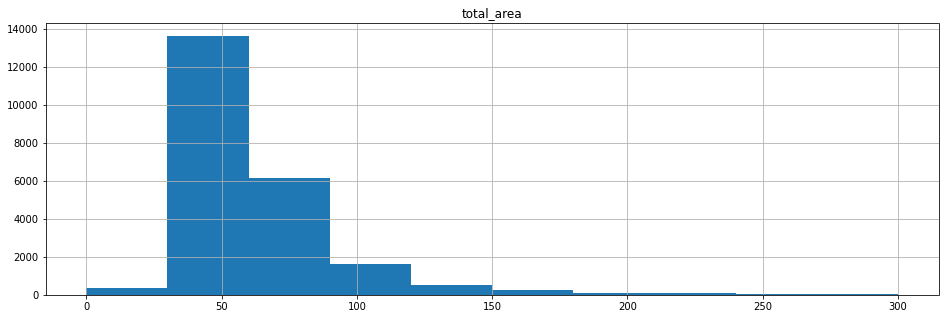

In [15]:
print(df.hist('total_area',range=(0,300),figsize=(16,5)))
print('Средняя площадь квартир:',round(df['total_area'].mean(),2))
print('Медианная площадь квартир:',round(df['total_area'].median(),2))


<div class="alert alert-info">
<font color='Blue'>

   <b> Наибольшее количество квартир имеют площадь от 30 до 65 кв.м. Заметно снижается количество квартир с площадью выше 80 кв.м и совсем редко встречаются квартиры с площадью выше 170 кв.м.

<div class="alert alert-info">
<font color='Blue'>

   <b> Наибольшее количество квартир стоят в диапазоне 4-7 миллионов, квартиры с ценой выше 30 миллионов встречаются очень редко.
      

[[<AxesSubplot:title={'center':'last_price'}>]]
Средняя цена квартиры: 6654275.52
Медианная цена квартиры: 4700000.0


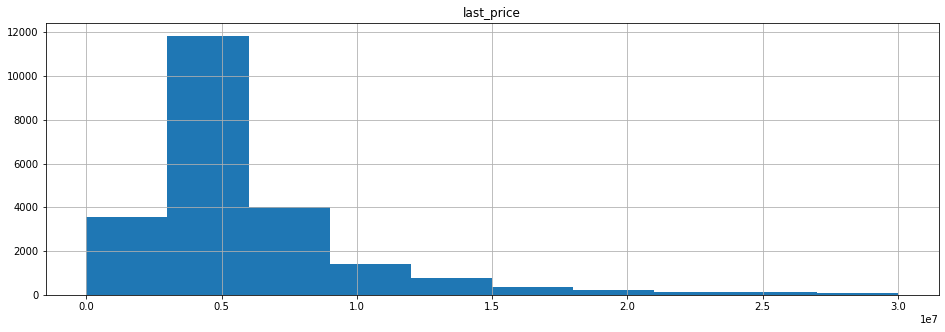

In [16]:
print(df.hist('last_price', range=(0,30000000),figsize=(16,5) ))
print('Средняя цена квартиры:',round(df['last_price'].mean(),2))
print('Медианная цена квартиры:',round(df['last_price'].median(),2))

[[<AxesSubplot:title={'center':'rooms'}>]]
Среднее количество комнат: 2.11
Медианное количество комнат: 2.0


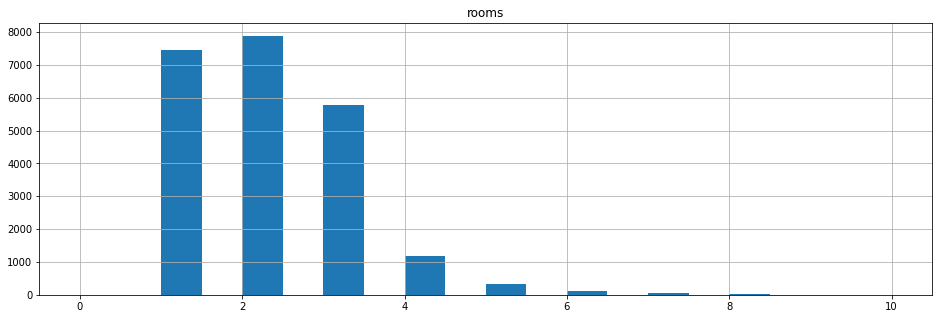

In [17]:
print(df.hist('rooms',bins=20 ,range=(0,10),figsize=(16,5) ))
print('Среднее количество комнат:',round(df['rooms'].mean(),2))
print('Медианное количество комнат:',round(df['rooms'].median(),2))


<div class="alert alert-info">
<font color='Blue'>

   <b> Наибольшее количество квартир имеют 1-3 комнаты, 4 и 5 комнаты встречаются реже и выше 6 совсем редко. 

[[<AxesSubplot:title={'center':'ceiling_height'}>]]
Средняя высота потолков: 2.72
Медианная высота потолков: 2.65


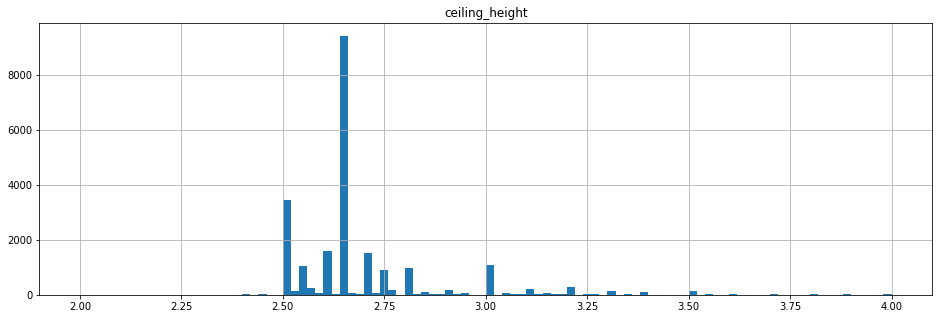

In [18]:
print(df.hist('ceiling_height',bins=100, range=(2,4),figsize=(16,5) ))
print('Средняя высота потолков:',round(df['ceiling_height'].mean(),2))
print('Медианная высота потолков:',round(df['ceiling_height'].median(),2))

<div class="alert alert-info">
<font color='Blue'>

   <b> Наибольшее количество квартир имеют всоту потолков 2.6м, часто попадается высота 2.5 метра, реже 3 метра.

[[<AxesSubplot:title={'center':'days_exposition'}>]]
Медиана дней до продажи равна: 95.0
Среднее дней до продажи равно: 171


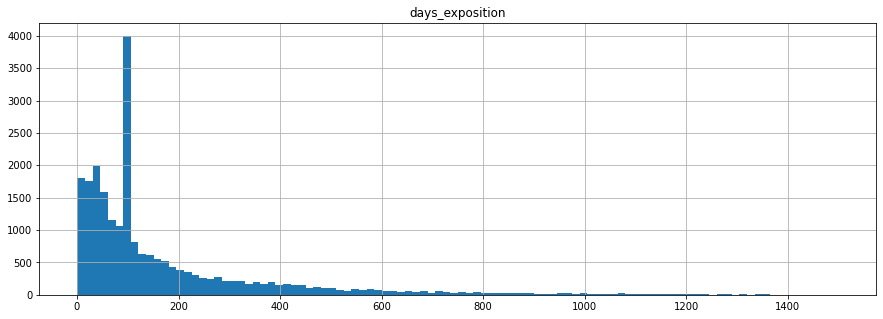

In [19]:
print(df.hist('days_exposition',bins=100, range=(1,1500),figsize=(15,5) ))

print('Медиана дней до продажи равна:',df['days_exposition'].median())
print('Среднее дней до продажи равно:',round(df['days_exposition'].mean()))

<div class="alert alert-info">
   
<font color='Blue'>

   <b> Среднее время продажы квартиры 170 дней значительно выше медианного значения из-за выбросов большого времени продажи свыше 800 дней, поэтому можно удалить редкие и выбивающиеся значения, так как самое частое время продажи квартиры около 100 дней, это значение будем считать обычным временем продажи, так же часто продажи случались в период от 0 до 60 дней. Так же есть предположение что дорогие квартиры продаются дольше. 
       <p>
           Поэтому убираем редкие и выбивающиеся значения, такие как цена выше 30 миллионов и слишком долгие периоды до продажи квартир:

In [20]:
df=df.query('last_price<30000000') # исключаю из таблицы квартиры стоимостью выше 30 миллионов, что бы уменьшить влияние выбросов на средние значения

In [21]:
df=df.query('rooms<7') # исключаю из таблицы квартиры c количеством комнат больше семи, что бы уменьшить влияние выбросов на средние значения

In [22]:
df=df.query('total_area<200') # исключаю из таблицы квартиры c площадью больше 200, что бы уменьшить влияние выбросов на средние значения

In [23]:
df=df.query('ceiling_height<3') # исключаю из таблицы квартиры c количеством комнат больше семи, что бы уменьшить влияние выбросов на средние значения

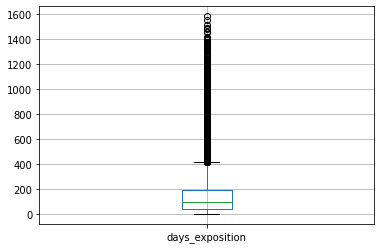

In [24]:
df.boxplot('days_exposition')
Q1 =  df['days_exposition'].quantile(0.25)
Q3 = df['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
#(df['days_exposition'] < Q1-1.5*IQR ) | (df['days_exposition'] > Q3+1.5*IQR)
df= df[(df['days_exposition'] > (Q1-1.5*IQR)) & (df['days_exposition'] < (Q3+1.5*IQR))]


Медиана дней до продажи равна: 95
Среднее дней до продажи равно: 110


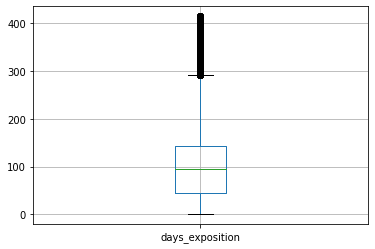

In [25]:
df.boxplot(column="days_exposition")
print('Медиана дней до продажи равна:',round(df['days_exposition'].median()))
print('Среднее дней до продажи равно:',round(df['days_exposition'].mean()))

[[<AxesSubplot:title={'center':'days_exposition'}>]]


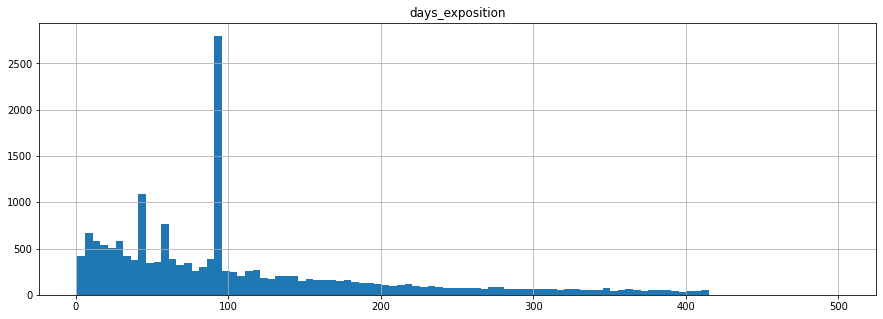

In [26]:
print(df.hist('days_exposition',bins=100, range=(1,500),figsize=(15,5) ))


<div class="alert alert-info">
<font color='Blue'>

   <b> Среднее значение стало намного ближе к медианному значению времени продажи квартир, теперь можно сказать что обычное время продажи квартир не превышает 4 месяца, так же часто квартиры продаются через 1.5-2 месяца.

<div class="alert alert-block alert-info"> Очистил о выбросов другие параметры

<div class="alert alert-info">
<b>Задание:</b>
      <p>Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
       <font color='Blue'>

   <b> Для этого найдем коэффициенты корреляции


In [27]:




def floor_name_number(row):
    floor=row['floor_name']
    if floor=='первый':
        return 1
    if floor=='другой':
        return 2
    else:
        return 3
    
df['floor_name_number']=df.apply(floor_name_number,axis=1)
df.head()
print('Коэффициент корреляции между ценой и площадью:',df['last_price'].corr(df['total_area']))
print('Коэффициент корреляции между ценой и количеством комнат:',df['last_price'].corr(df['rooms']))
print('Коэффициент корреляции между ценой и расстоянием до центра:',df['last_price'].corr(df['cityCenters_nearest']))
print('Коэффициент корреляции между ценой и этажом(первый, последний или другой):',df['last_price'].corr(df['floor_name_number']))
print('Коэффициент корреляции между ценой и дней до продажи:',df['last_price'].corr(df['days_exposition']))



Коэффициент корреляции между ценой и площадью: 0.7627850463354904
Коэффициент корреляции между ценой и количеством комнат: 0.44896025792074257
Коэффициент корреляции между ценой и расстоянием до центра: -0.21752915435499887
Коэффициент корреляции между ценой и этажом(первый, последний или другой): 0.03765700193133295
Коэффициент корреляции между ценой и дней до продажи: 0.04060421523773538


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2</b>

👍🏼

</div>

<div class="alert alert-info">

<font color='Blue'>

   <b> На стоимость квартиры сильнее всего влияет площадь и количество комнат, а так же удалённость от центра. Количество этажей и время размещения объявления влияет меньше.

<div class="alert alert-block alert-info"> Добавил колонки с годом и с месяцем для изучения зависимости и построил гистограммы

In [28]:
df['year']=pd.DatetimeIndex(df['date']).year
df['month']=pd.DatetimeIndex(df['date']).month
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_meter,floor_name,date,weekday,ratio_living_area,ratio_kitchen_area,floor_name_number,year,month
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,95,120370.370370,другой,2019-03-07,3,0.472,0.231,2,2019,3
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,True,...,81,82920.792079,первый,2018-12-04,1,0.460,0.272,1,2018,12
5,10,2890000,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,True,...,55,95065.789474,другой,2018-09-10,0,0.474,0.299,2,2018,9
6,6,3700000,37.3,2017-11-02T00:00:00,1,2.65,26,10.6,6,True,...,155,99195.710456,другой,2017-11-02,3,0.284,0.386,2,2017,11
7,5,7915000,71.6,2019-04-18T00:00:00,2,2.65,24,30.0,22,True,...,95,110544.692737,другой,2019-04-18,3,0.419,0.264,2,2019,4


array([[<AxesSubplot:title={'center':'weekday'}>]], dtype=object)

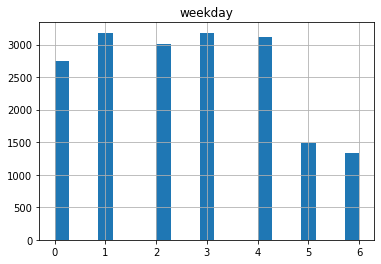

In [29]:
df.hist(['weekday'],bins=21)

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

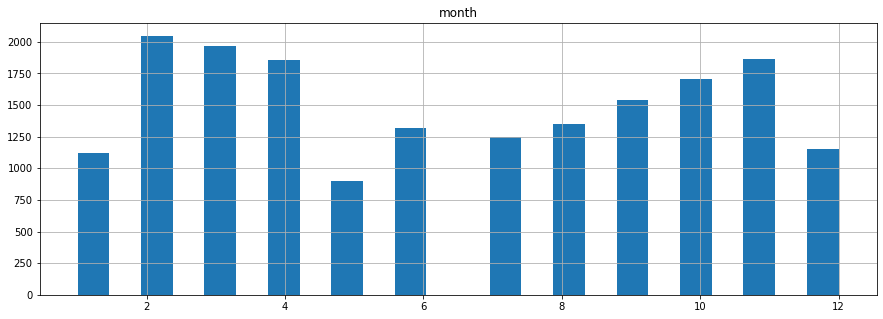

In [30]:
df.hist(['month'],bins=24,figsize=(15,5))

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

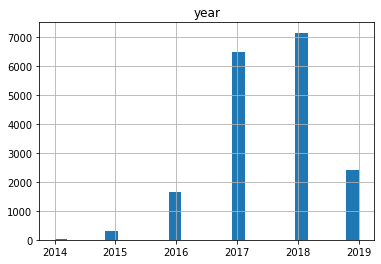

In [31]:
df.hist(['year'],bins=24)

<div class="alert alert-info">
<font color='Blue'>

   <b>Исправил количество столбцов на кратное(семи дням, 12 месяцам и 6 годам соответственно)

<div class="alert alert-block alert-info"> По гистограммам видно, что количество объявлений в 2017 и 2018 годах была гораздо выше чем в 2014-2016 и в 2019 возможно это связано с финансовым кризисом, когда вырос спрос на покупку недвижимости, что бы убереь деньги от инфляции. Так же количество объявления заметно ниже в летние месяцы, в мае, в декабре и в январе возможно это связано с отпусками и праздничными днями, так как в выходные дни так же видно, что количество объявлений меньше чем в будние дни.  

<div class="alert alert-info">
<b>Задание:</b>
      <p>Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [32]:
df['locality_name'].unique()
df['locality_name'].value_counts().head(10)


Санкт-Петербург      11513
посёлок Мурино         403
посёлок Шушары         390
Всеволожск             327
Колпино                292
посёлок Парголово      289
Пушкин                 287
Гатчина                250
деревня Кудрово        221
Выборг                 183
Name: locality_name, dtype: int64

In [33]:

df_SPB=df.query('locality_name == "Санкт-Петербург"')
df_SPB.head()
print('\033[1m' + '\033[94m'+'Cредняя цена за метр в Санкт-Петербурге:' '\033[0m', round(df_SPB['price_for_meter'].mean()))

df_Murino=df.query('locality_name == "посёлок Мурино"')
print('Cредняя цена за метр в посёлке Мурино:',round(df_Murino['price_for_meter'].mean()))


df_Shushari=df.query('locality_name == "посёлок Шушары"')
print('Cредняя цена за метр в посёлке Шушары:',round(df_Shushari['price_for_meter'].mean()))

df_Vsevolshk=df.query('locality_name == "Всеволожск"')
print('Cредняя цена за метр в Всеволжске:',round(df_Vsevolshk['price_for_meter'].mean()))

df_Pushkin=df.query('locality_name == "Пушкин"')
print('Cредняя цена за метр в Пушкине:',round(df_Pushkin['price_for_meter'].mean()))

df_Kolpino=df.query('locality_name == "Колпино"')
print('Cредняя цена за метр в Колпино:',round(df_Kolpino['price_for_meter'].mean()))

df_Pargolovo=df.query('locality_name == "посёлок Парголово"')
print('Cредняя цена за метр в посёлке Парголово:',round(df_Pargolovo['price_for_meter'].mean()))

df_Gatchina=df.query('locality_name == "Гатчина"')
print('Cредняя цена за метр в Гатчине:',round(df_Gatchina['price_for_meter'].mean()))


df_Kudrovo=df.query('locality_name == "деревня Кудрово"')
print('Cредняя цена за метр в деревне Кудрово:',round(df_Kudrovo['price_for_meter'].mean()))

df_Viborg=df.query('locality_name == "Выборг"')
print('\033[1m' + '\033[91m'+'Cредняя цена за метр в Выборге:''\033[0m',round(df_Viborg['price_for_meter'].mean()))

Cредняя цена за метр в Санкт-Петербурге: 107627
Cредняя цена за метр в посёлке Мурино: 85113
Cредняя цена за метр в посёлке Шушары: 78104
Cредняя цена за метр в Всеволжске: 68566
Cредняя цена за метр в Пушкине: 101420
Cредняя цена за метр в Колпино: 75328
Cредняя цена за метр в посёлке Парголово: 89726
Cредняя цена за метр в Гатчине: 68452
Cредняя цена за метр в деревне Кудрово: 91933
Cредняя цена за метр в Выборге: 57422


<div class="alert alert-info">
<font color='Blue'>

   <b>Самое дорогое жильё в Санкт-Петербурге, а самая низкая цена в Выборге.

<div class="alert alert-info">
<b>Задание:</b>
      <p>
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_SPB['distance_to_center_km']=round(df_SPB['cityCenters_nearest']/1000)
df_SPB.head()
#df_SPB.plot(y='last_price', x='distance_to_center_km', kind='scatter',figsize=(16,5)) 

df_SPB['distance_to_center_km']=df_SPB['distance_to_center_km'].astype('int')#тип int, для удобства работы 

kilometrs=[]
kilometrs=df_SPB['distance_to_center_km'].unique()
kilometrs.sort()
print(kilometrs)


#df_temp=df_SPB.query('distance_to_center_km==1')
#df_temp.head()
def calculate_mean(dataframe):
    for i in kilometrs:
        df_temp=round(dataframe.query('distance_to_center_km==@i').mean())
        print('Для',i,'километров cредняя цена:',df_temp['last_price'])

        
df_SPB_temp=calculate_mean(df_SPB)

#df_SPB_temp.plot(y='last_price', x='distance_to_center_km', kind='scatter',figsize=(16,5))
        

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Для 0 километров cредняя цена: 8325000.0
Для 1 километров cредняя цена: 10714776.0
Для 2 километров cредняя цена: 9609051.0
Для 3 километров cредняя цена: 9353015.0
Для 4 километров cредняя цена: 9028145.0
Для 5 километров cредняя цена: 9773332.0
Для 6 километров cредняя цена: 8731330.0
Для 7 километров cредняя цена: 8630260.0
Для 8 километров cредняя цена: 8103936.0
Для 9 километров cредняя цена: 6111739.0
Для 10 километров cредняя цена: 5981910.0
Для 11 километров cредняя цена: 5773917.0
Для 12 километров cредняя цена: 5748867.0
Для 13 километров cредняя цена: 6127286.0
Для 14 километров cредняя цена: 5560740.0


/tmp/ipykernel_186/130169658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPB['distance_to_center_km']=round(df_SPB['cityCenters_nearest']/1000)
/tmp/ipykernel_186/130169658.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPB['distance_to_center_km']=df_SPB['distance_to_center_km'].astype('int')#тип int, для удобства работы


Для 15 километров cредняя цена: 5646104.0
Для 16 километров cредняя цена: 5310577.0
Для 17 километров cредняя цена: 5198488.0
Для 18 километров cредняя цена: 4870773.0
Для 19 километров cредняя цена: 5153813.0
Для 20 километров cредняя цена: 6118614.0
Для 21 километров cредняя цена: 5320260.0
Для 22 километров cредняя цена: 5444208.0
Для 23 километров cредняя цена: 4947257.0
Для 24 километров cредняя цена: 3942273.0
Для 25 километров cредняя цена: 4260942.0
Для 26 километров cредняя цена: 4051063.0
Для 27 километров cредняя цена: 2250000.0
Для 28 километров cредняя цена: 4597500.0
Для 29 километров cредняя цена: 3650000.0


AxesSubplot(0.125,0.125;0.775x0.755)


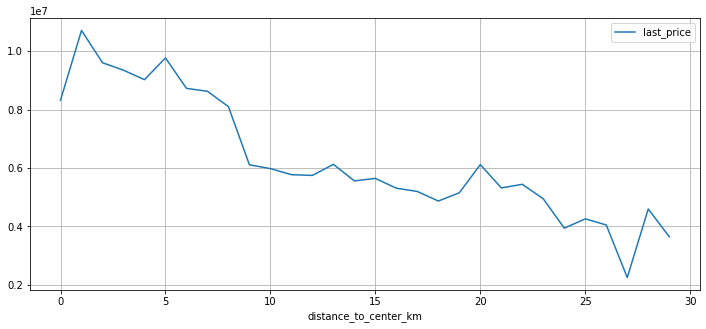

In [35]:
print(df_SPB.pivot_table(aggfunc='mean',index='distance_to_center_km',values='last_price').plot(grid=True,figsize=(12,5)))

<div class="alert alert-info">
<font color='Blue'>

   <b>Область до седьмого километра входит в центр. Чем дальше от центра тем ниже цена квартир.

<div class="alert alert-info">
<b>Задание:</b>
      <p>
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [36]:
df_SPB_center=df_SPB.query('distance_to_center_km<=7')
df_SPB_center.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_for_meter,floor_name,date,weekday,ratio_living_area,ratio_kitchen_area,floor_name_number,year,month,distance_to_center_km
24,8,6500000,97.2,2015-10-31T00:00:00,2,2.65,3,46.5,1,True,...,66872.427984,первый,2015-10-31,5,0.478,0.202,1,2015,10,2
94,3,3500000,29.5,2019-04-26T00:00:00,1,2.50,5,15.6,2,True,...,118644.067797,другой,2019-04-26,4,0.529,0.186,2,2019,4,7
99,32,9600000,90.0,2017-09-26T00:00:00,4,2.65,5,67.0,2,True,...,106666.666667,другой,2017-09-26,1,0.744,0.089,2,2017,9,3
111,4,4590000,40.0,2017-05-29T00:00:00,1,2.65,6,18.0,1,True,...,114750.000000,первый,2017-05-29,0,0.450,0.250,1,2017,5,6
114,5,4000000,21.4,2019-02-07T00:00:00,1,2.90,8,8.3,7,True,...,186915.887850,другой,2019-02-07,3,0.388,0.294,2,2019,2,6


[[<AxesSubplot:title={'center':'total_area'}>]]
Средняя площадь квартиры в центре Санкт-Петербурга: 72.94
Медианная площадь квартиры в центре Санкт-Петербурга: 67.5


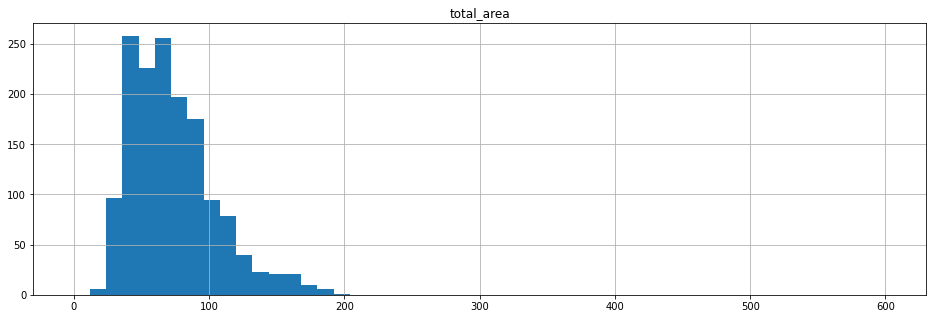

In [37]:
print(df_SPB_center.hist('total_area',bins=50,range=(0,600),figsize=(16,5)))
print('Средняя площадь квартиры в центре Санкт-Петербурга:',round(df_SPB_center['total_area'].mean(),2))
print('Медианная площадь квартиры в центре Санкт-Петербурга:',round(df_SPB_center['total_area'].median(),2))


<div class="alert alert-info">
<font color='Blue'>

   <b>Средняя площадь квартир в центре 81 кв.м выше средней площади квартир по всей базе 58 кв.м. Таким образом в центре квартиры имеют площадь больше.

[[<AxesSubplot:title={'center':'last_price'}>]]
Средняя цена квартиры в центре Санкт-Петербурга: 9213543.99
Медианная цена квартиры в центре Санкт-Петербурга: 7900000.0


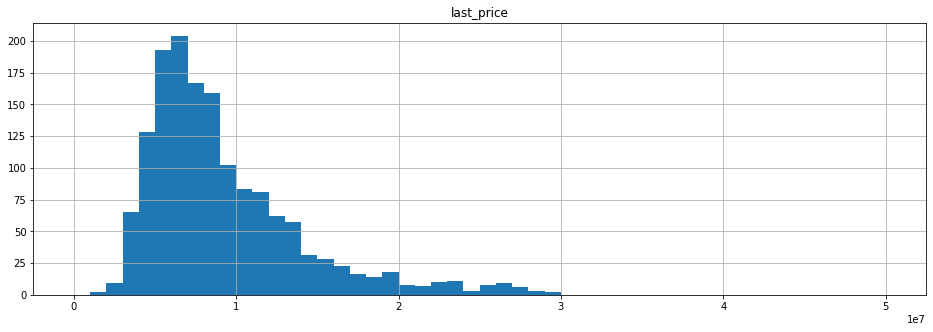

In [38]:
print(df_SPB_center.hist('last_price',bins=50,range=(0,50000000),figsize=(16,5)))
print('Средняя цена квартиры в центре Санкт-Петербурга:',round(df_SPB_center['last_price'].mean(),2))
print('Медианная цена квартиры в центре Санкт-Петербурга:',round(df_SPB_center['last_price'].median(),2))


<div class="alert alert-info">
<font color='Blue'>

   <b>Средняя цена квартиры в центре 10 миллионов, а по всей базе средняя цена 5,6 миллиона. Таким образом в центре квартиры стоят дороже. 

[[<AxesSubplot:title={'center':'rooms'}>]]
Средняя количество комнат в центре Санкт-Петербурга: 2.43
Медианная количество комнат в центре Санкт-Петербурга: 2.0


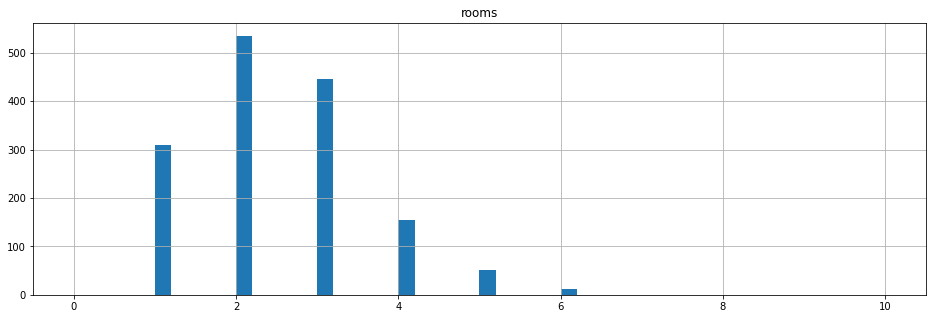

In [39]:
print(df_SPB_center.hist('rooms',bins=50,range=(0,10),figsize=(16,5)))
print('Средняя количество комнат в центре Санкт-Петербурга:',round(df_SPB_center['rooms'].mean(),2))
print('Медианная количество комнат в центре Санкт-Петербурга:',round(df_SPB_center['rooms'].median(),2))

<div class="alert alert-info">
<font color='Blue'>

   <b>Среднее количество комнат в центре почти 3, а вобщей базе 2. Можно сделать вывод что в центре квартиры имеют большее количество комнат.

[[<AxesSubplot:title={'center':'ceiling_height'}>]]
Средняя высота потолков в центре Санкт-Петербурга: 2.68
Медианная высота потолков в центре Санкт-Петербурга: 2.65


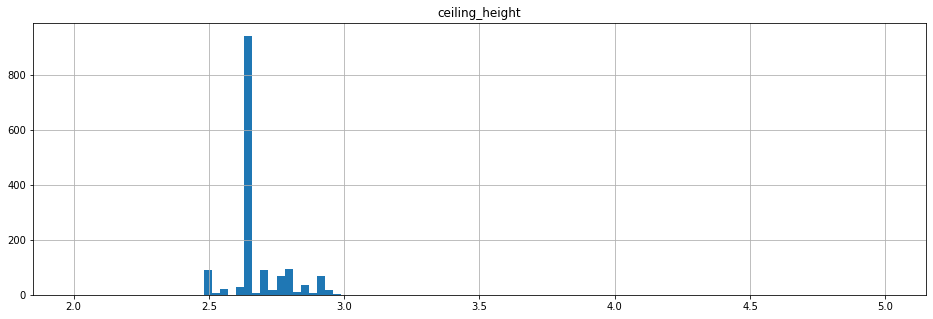

In [40]:
print(df_SPB_center.hist('ceiling_height',bins=100,range=(2,5),figsize=(16,5)))
print('Средняя высота потолков в центре Санкт-Петербурга:',round(df_SPB_center['ceiling_height'].mean(),2))
print('Медианная высота потолков в центре Санкт-Петербурга:',round(df_SPB_center['ceiling_height'].median(),2))




<div class="alert alert-info">
<font color='Blue'>

   <b>Средняя высота потолков в центре 2.93, а по всей базе данных 2,71. В центре высота потолков выше.

In [41]:
print('Коэффициент корреляции между ценой и площадью:',df_SPB_center['last_price'].corr(df['total_area']))
print('Коэффициент корреляции между ценой и количеством комнат:',df_SPB_center['last_price'].corr(df['rooms']))
print('Коэффициент корреляции между ценой и расстоянием до центра:',df_SPB_center['last_price'].corr(df['cityCenters_nearest']))
print('Коэффициент корреляции между ценой и этажом(первый, последний или другой):',df_SPB_center['last_price'].corr(df['floor_name_number']))
print('Коэффициент корреляции между ценой и дней до продажи:',df['last_price'].corr(df_SPB_center['days_exposition']))



Коэффициент корреляции между ценой и площадью: 0.7322796720728958
Коэффициент корреляции между ценой и количеством комнат: 0.44480230296333906
Коэффициент корреляции между ценой и расстоянием до центра: -0.06544311015390417
Коэффициент корреляции между ценой и этажом(первый, последний или другой): 0.0957317976740264
Коэффициент корреляции между ценой и дней до продажи: 0.10112738575080191


<div class="alert alert-info">
<font color='Blue'>

   <b>На стоимость квартиры сильнее всего влияет площадь и количество комнат. 
    <p>Количество этажей и время размещения объявления влияет меньше.
        <p> В основном данные по корреляции в центре совпадают с данными из общей базы, кроме расстояния до центра.

## Общий вывод

<div class="alert alert-info">
<font color='Blue'>

   <b>На основе проведённого анализа можно сделать следующий вывод: Стоимость квартир сильно зависит от площади квартиры, от количества комнат и от близости к центру. Цена выше чем больше площадь, чем больше комнат и чем ближе к центру. 
    <p>Количество этажей и время размещения объявления влияет на стоимость квартиры не значительно.
        <p> Так же можно сделать вывод что квартиры в центре дороже, имеют большее количество комнат, выше потолки и имеют площадь в среднем больше чем квартиры из общей базы.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод